![Colegio Bourbaki](./Images/Bourbaki.png)

## Machine Learning

### Introducción a series de tiempo

#### Procesos Estocásticos y modelos autorregresivos (AR)

Un **proceso estocástico** es un conjunto de variables aleatorias indexadas en el tiempo o en el espacio, que representan cómo cambia una variable a lo largo del tiempo de una forma que no es determinista sino que está sujeta al azar. Estos procesos son fundamentales en diversos campos, como las finanzas, la economía, la ingeniería y las ciencias naturales, donde se utilizan para modelizar fenómenos que evolucionan siguiendo un patrón predecible intercalado con elementos aleatorios.

Los procesos estocásticos pueden clasificarse en función de su espacio de estados (valores discretos o continuos) y su espacio de parámetros (tiempo discreto o continuo). Abarcan una amplia gama de modelos, como las cadenas de Markov, los procesos de Poisson y el movimiento browniano, cada uno con sus propiedades y aplicaciones específicas.

#### Modelos Autorregresivos (AR)

Los modelos autorregresivos son un tipo específico de proceso estocástico muy utilizado en el análisis de series temporales. 

Un modelo AR expresa el valor actual de una serie temporal como una combinación lineal de sus valores pasados más un término de error estocástico. La forma general de un modelo AR de orden $p$ (denominado AR(p)) viene dada por:

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t
$$

donde:

* $X_t$ es el valor de la serie temporal en el momento $t$,
* $ϕ_1,ϕ_2,...,ϕ_p$ son los parámetros del modelo,
* $p$ es el orden del modelo que indica cuántos valores pasados se consideran,
* $ϵ_t$ es el término de error en el tiempo $t$, que a menudo se supone que es ruido blanco con una distribución normal.

##### Propiedades de los modelos AR

Las propiedades más importantes son:

* **Estacionaridad:** Para que un modelo AR sea estacionario, sus parámetros deben cumplir determinadas condiciones. La estacionaridad implica que las propiedades estadísticas del proceso (media, varianza) no cambian con el tiempo. Para un modelo AR(1) en el que $X_t=ϕX_{t-1}+ϵ_t$, el proceso es estacionario si $∣ϕ∣<1$.

* **Reversión de la media:** Los modelos AR suelen mostrar un comportamiento de reversión a la media, en el que la serie tiende a retroceder hacia la media o la tendencia con el paso del tiempo. Esta propiedad es especialmente evidente en las series temporales financieras, como los tipos de interés y los precios de las acciones.

* **Predicción:** Los modelos AR se utilizan mucho para predecir los valores futuros de una serie temporal a partir de sus propios valores pasados. La capacidad de predicción del modelo depende de su orden $p$ y de lo bien que capte la dinámica subyacente del proceso.

* **Estimación:** Los parámetros de los modelos AR ($ϕ_1,ϕ_2,...,ϕ_p$) pueden estimarse mediante diversos métodos, como el método de los momentos, la estimación de máxima verosimilitud y los mínimos cuadrados. La elección del método puede depender de las propiedades de la serie temporal y de la aplicación específica.

### Librerías

In [34]:
# Simulación de procesos estocásticos
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Utils
import matplotlib.pyplot as plt
import pandas as pd

### Funciones de ayuda

In [35]:
def genera_puntos_regresion(m, b, sigma, size=10):
    '''genera coordenadas en x y y de puntos aleatorios
    en regresión.
    m: pendiente
    b: ordenada al origen
    sigma: desviación estándar de errores gaussianos
    size: cantidad de puntos a generar'''
    
    
    xdata = np.linspace(-1.0, 1.0, size)
    errors = np.random.normal(0, sigma, size) 
    ydata = m * xdata + b + errors

    return xdata, ydata

### Simulaciones

Primero, vamos a comenzar simulando, sin ruido, puntos en 2d a partir de la ecuación de una recta:

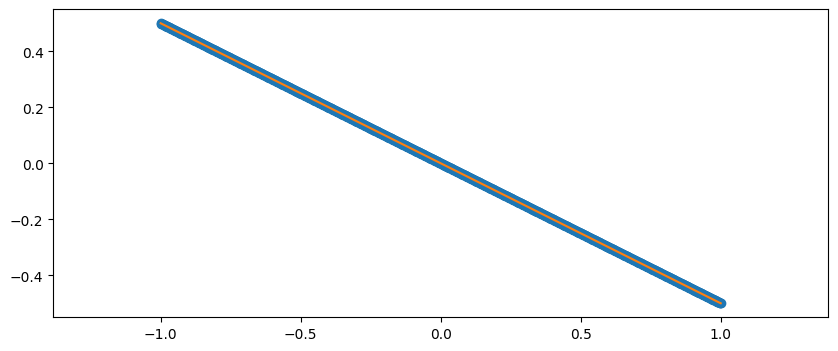

In [36]:
m = -0.5
b = 0
sigma = 0

xs, ys = genera_puntos_regresion(m, b, sigma, size=1000)

fig = plt.figure(figsize = (10, 4))
plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)

plt.axis('equal')
plt.show()

Ahora, vamos a realizarlo con ruido:

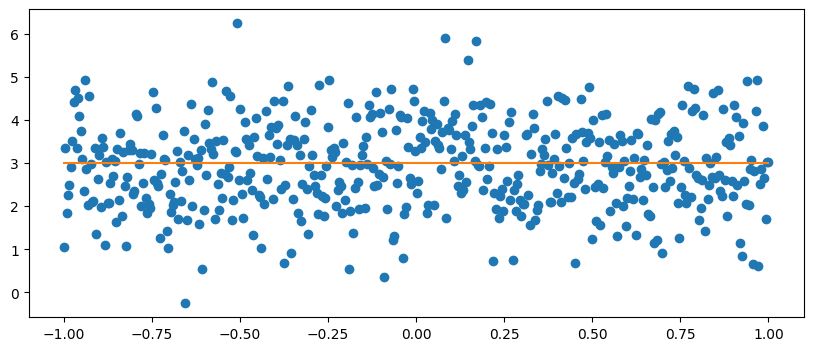

In [37]:
m = 0.0
b = 3
sigma = 1

fig = plt.figure(figsize = (10, 4))
xs, ys = genera_puntos_regresion(m, b, sigma, size=500)

plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)
plt.show()

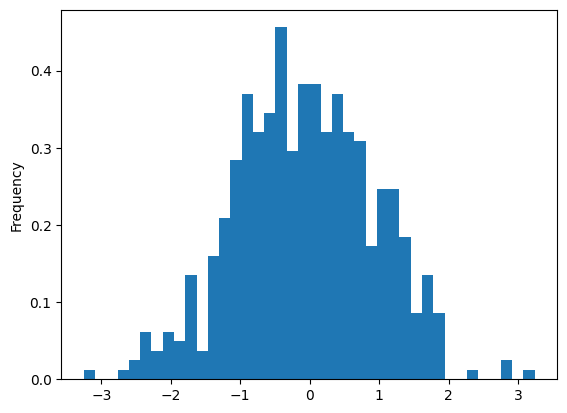

In [38]:
errors = ys -  m * xs - b 
pd.Series(errors).plot.hist(bins=40, density = True)
plt.show()

Ahora vamos a proceder a simular ruido blanco. El ruido blanco es un concepto fundamental en el análisis de series temporales, el tratamiento de señales y diversos campos de la ingeniería y la física. Se refiere a una señal o proceso aleatorio que tiene las siguientes características clave:


* **Espectro de potencia constante:** El ruido blanco tiene un espectro de frecuencias plano en una amplia gama de frecuencias. Esto significa que todas las frecuencias contribuyen por igual a la potencia de la señal, lo que le confiere un espectro de potencia constante. Esta característica es análoga a la luz blanca, que contiene todas las frecuencias del espectro visible con la misma intensidad, de ahí el término ruido "blanco".

* **Media cero:** En su forma más común, el ruido blanco tiene un valor medio de cero, lo que indica que los valores positivos y negativos de la señal están equilibrados en el tiempo.

* **Independencia:** Los valores del ruido en diferentes momentos son estadísticamente independientes entre sí. En otras palabras, no hay correlación entre los valores en distintos momentos. Esto implica que conocer el valor del ruido en un momento dado no proporciona ninguna información sobre su valor en cualquier otro momento.

* **Idénticamente distribuido:** Los valores del ruido blanco se distribuyen de forma idéntica, siguiendo normalmente una distribución gaussiana (normal) con una varianza constante. Esta distribución no cambia con el tiempo, lo que garantiza que las propiedades estadísticas del ruido permanezcan constantes.

Veamos ruido blando IID:

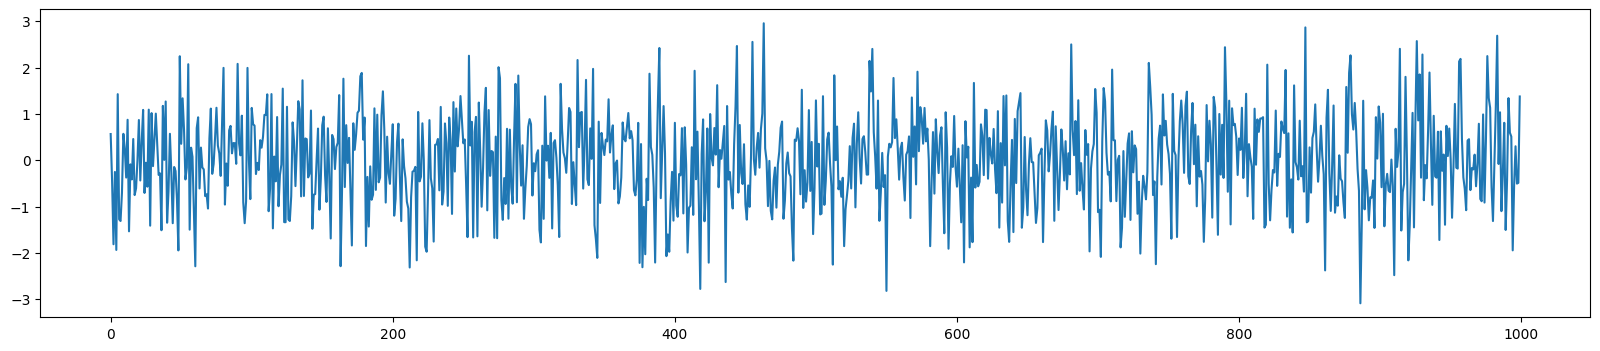

In [39]:
mean = 0
std = 1
num_muestras = 1000
white_noise = pd.Series(np.random.normal(mean, std, num_muestras))

white_noise.plot(figsize = (20,4))
plt.show()

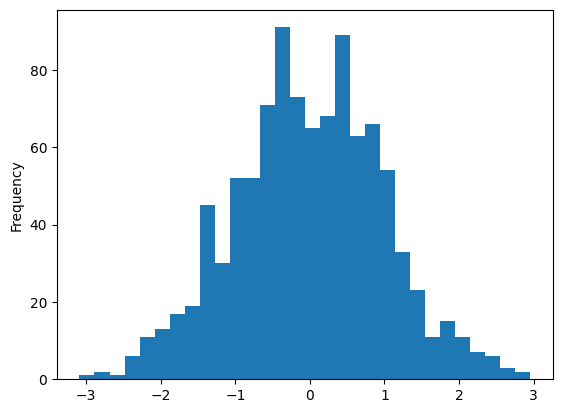

In [40]:
white_noise.plot.hist(bins=30)
plt.show()

Ahora, vamos a introducir la función de autocorrelación.

La **función de autocorrelación (ACF)** es una herramienta fundamental en el análisis estadístico, especialmente en el análisis de series temporales, que se utiliza para medir la relación lineal entre los valores retardados de una serie temporal. Cuantifica la correlación entre observaciones en distintos momentos, separadas por un determinado número de retardos. El ACF proporciona información sobre la estructura interna de los datos, como las tendencias, los patrones estacionales y el grado de aleatoriedad.

Usos y aplicaciones:

* **Detección de la no aleatoriedad:** Si una serie temporal es puramente aleatoria (ruido blanco), la ACF mostrará valores cercanos a cero para todos los rezagos excepto en el rezago 0. Las autocorrelaciones significativas distintas de cero indican no aleatoriedad y la presencia de una estructura en los datos.

* **Identificación de la estacionaridad:** Los picos periódicos en el ACF indican efectos estacionales. El desfase en el que se producen estos picos puede ayudar a identificar el periodo de estacionaridad.

* **Identificación del modelo:** En el contexto de la modelización ARIMA, el ACF ayuda a determinar el orden adecuado de los componentes de la media móvil (MA). Una caída lenta en el ACF sugiere un proceso AR, mientras que un corte brusco después de unos pocos rezagos sugiere un proceso MA.

* **Comprensión de la dependencia de los datos:** El ACF proporciona información sobre la estructura de dependencia de los datos, que es crucial para las decisiones de modelización y previsión.

Algunas consideraciones prácticas:

* **Función de autocorrelación parcial (PACF):** Junto con la ACF, la PACF se utiliza para medir la correlación entre $X_t$ y $X_{t-k}$ que no se explica por sus correlaciones mutuas con las observaciones intermedias. El PACF es especialmente útil para identificar el orden de los componentes AR en la modelización de series temporales.

* **Significación estadística:** Es importante distinguir entre las autocorrelaciones estadísticamente significativas y las que podrían surgir **por casualidad**. A menudo se utilizan intervalos de confianza para evaluar la importancia de los valores ACF y PACF.

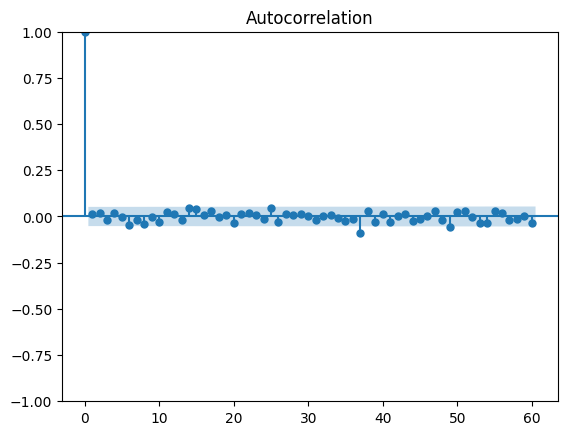

In [45]:
plot_acf(white_noise, alpha=0.1, lags=60)
plt.show()

Veamos la función de autocorrelación parcial

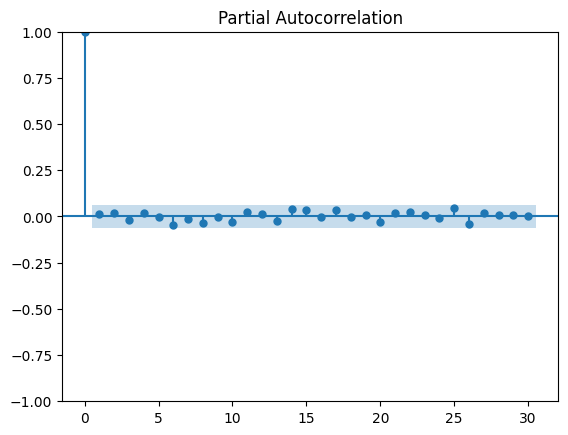

In [46]:
plot_pacf(white_noise, alpha=0.05, lags=30)
plt.show()

Veamos un ejemplo:

Sea $X_t$ un proceso IID y el proceso estocástico definido por:

- $Z_t = X_t$ cuando t es par, y 

- $Z_t = \frac{1}{\sqrt{2}}(X^2_{t-1}-1)$ cuando t es impar, es un ruido blanco

In [48]:
num_samples=10000

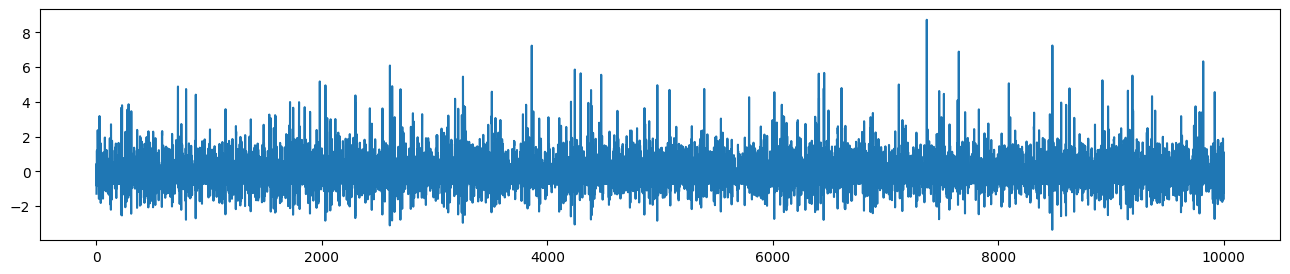

In [49]:
Xt = pd.Series(np.random.normal(size= num_samples))
Zt = pd.Series(np.zeros(num_samples))
for i in range(len(Zt)):
  if i % 2 == 0:
    Zt[i]= Xt[i]
  else:
    Zt[i] = 1/np.sqrt(2)*(pow(Xt[i-1], 2)-1)

Zt.plot(figsize = (16,3))
plt.show()

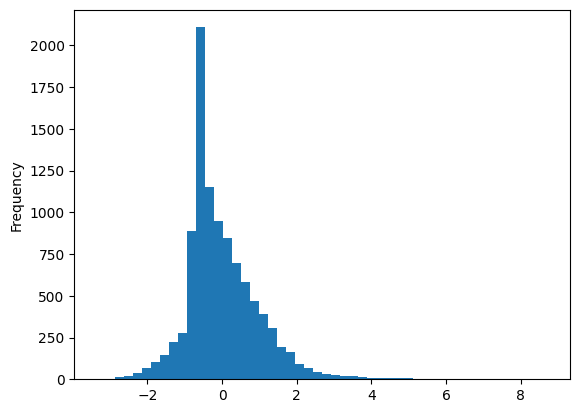

In [50]:
Zt.plot.hist(bins=50)
plt.show()

In [52]:
plot_acf(Zt, alpha=0.05, lags=30)
plt.show()

In [ ]:
plot_pacf(Zt, alpha=0.05, lags=30)
plt.show()

Veamos una simulación de ruido blanco con distribucion de Laplace, combinado con una distribucion de Bernoulli:

Sea $X_t$ un proceso IID y $Y$ una variable aleatoria con distribución de Laplace.

Entonces la variable aleatoria: 

$Z_t = X_t~Y - X_t(Y-1)^2$ es un ruido blanco

In [ ]:
X_t = pd.Series(np.random.laplace(loc=0, scale=1, size=num_samples))
Y = pd.Series(np.random.binomial(1, p=0.5, size=num_samples))
Z_t = (X_t * Y) - X_t * pow((Y - 1), 2)

Z_t.plot(figsize=(16, 3))
plt.show()

In [ ]:
Z_t.plot.hist(bins=50)
plt.show()

In [ ]:
plot_acf(Z_t, alpha=0.05, lags=30)
plt.show()

#### Simulación de un proceso autorregresivo  (AR)

In [ ]:
coef = 0.9 
ar = np.array([1, - coef]) 
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)

AR_simulacion = pd.Series(AR_model.generate_sample(nsample=1000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

In [ ]:
AR_simulacion.plot.hist(bins=50)
plt.show()

In [ ]:
plot_acf(AR_simulacion, alpha=0.05, lags=30)
plt.show()

En los proceso autorregresivos la función de autocorrelación parcial **(PACF)** se utiliza para investigar cuántos retrasos es necesario considerar en el modelo **Auto Regresivo**:

In [ ]:
plot_pacf(AR_simulacion, alpha=0.05, lags=30)
plt.show()

Veamos un proceso autorregresivo de orden 2:

In [ ]:
ar = np.array([1, - 0.9, .5]) 
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)

AR_simulacion = pd.Series(AR_model.generate_sample(nsample=1000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

In [ ]:
AR_simulacion.plot.hist(bins=50)
plt.show()

In [ ]:
plot_acf(AR_simulacion, alpha=0.05, lags=30)
plt.show()

In [ ]:
plot_pacf(AR_simulacion, alpha=0.05, lags=30)
plt.show()

#### Simulación de serie de tiempo Medias Móviles (MA)

In [ ]:
coef = .5
ar = np.array([1]) 
ma = np.array([1, coef])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=1000))
MA_simulacion.plot(figsize = (16,6), title=titulo)
plt.show()

In [ ]:
MA_simulacion.plot.hist(figsize=(4,4), bins=50)
plt.show()

Para los modelos de **medias móviles** se utiliza la función de autocorrelación (**ACF**) para investigar el orden del modelo. 

In [ ]:
plot_acf(MA_simulacion, alpha=0.05, lags=30)
plt.show()

In [ ]:
plot_pacf(MA_simulacion, alpha=0.05, lags=30)
plt.show()

Veamos otra simulación de medias móviles:

In [ ]:
ar = np.array([1]) 
ma = np.array([1, 0.5, 0.8])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=1000))
MA_simulacion.plot(figsize = (16,6), title=titulo)
plt.show()

In [ ]:
MA_simulacion.plot.hist(figsize=(4,4), bins=50)
plt.show()

In [ ]:
plot_acf(MA_simulacion, alpha=0.05, lags=30)
plt.show()

In [ ]:
plot_pacf(MA_simulacion, alpha=0.05, lags=30)
plt.show()

**Ejercicios:**

**Conceptos Teóricos:**

1) ¿Qué es un proceso estocástico y cómo se diferencia de un proceso determinista?

2) Explique el concepto de ruido blanco. ¿Por qué es importante en el análisis de series temporales?

3) ¿Qué es un modelo autorregresivo (AR) y cómo se puede utilizar para predecir futuros valores de una serie temporal?

4) Describa la diferencia entre autocorrelación y autocorrelación parcial. ¿Cómo se utilizan estas medidas en la modelación de series temporales?

**Aplicaciones Prácticas:**

5) Dado un conjunto de datos de serie temporal, describa los pasos que seguiría para ajustar un modelo AR.

6) ¿Cómo se determina el orden adecuado de un modelo AR para una serie temporal específica?

7) Proporcione un ejemplo de un fenómeno real que podría modelarse como un proceso estocástico y explique por qué un modelo autorregresivo sería adecuado (o no) para tal caso.

**Interpretación de Resultados:**

8) ¿Qué indicaría si los residuos de un modelo autorregresivo ajustado muestran autocorrelación significativa?

9) Suponga que ha simulado una serie temporal utilizando un modelo AR(1) con un parámetro específico. Si aumenta el valor del parámetro, ¿cómo espera que cambie la serie temporal simulada?

**Desafíos de Modelación:**

10) Explique cómo modelaría una serie temporal con tendencia y estacionaridad utilizando modelos autorregresivos.


![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)